# Q1: Simple numerical integral

Quadrature result: 1.7724538509027912 4.636623029965036e-14
Simpson result:
[1.77245385 1.77245385 1.77245385 1.77245385 1.77245385]


<IPython.core.display.Javascript object>


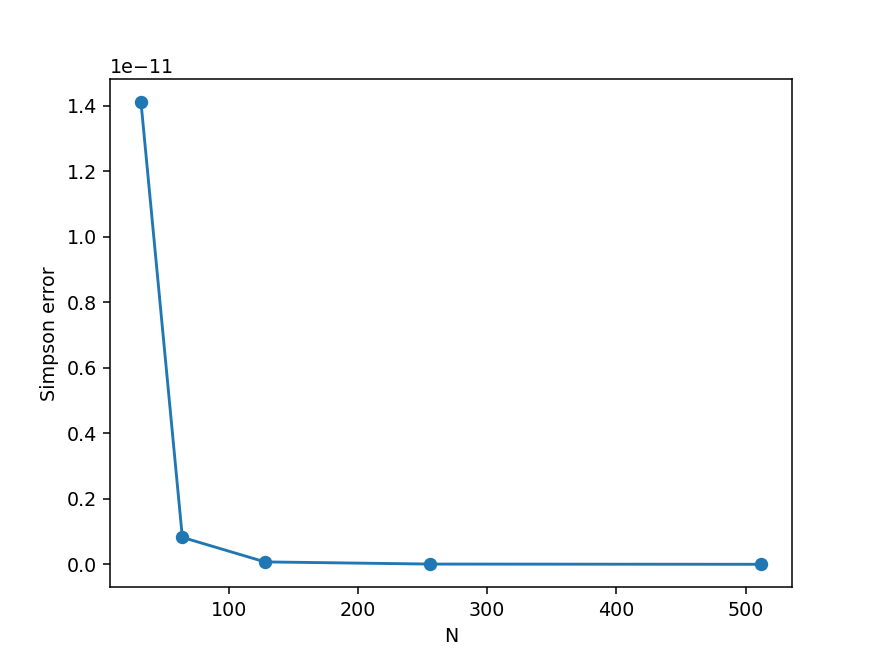

Text(0, 0.5, 'Simpson error')

In [6]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook 

'''integrate.quad'''
f_quad = lambda x: np.exp(-x**2)
integral_quad, error_quad = integrate.quad(f_quad, -5, 5)
print('Quadrature result:', integral_quad, error_quad)

'''simpson method'''
N = np.array([32, 64, 128, 256, 512])
#x = np.linspace(-5, 5, 32)
#f = np.exp(-x**2)

error_simps = np.zeros(len(N))
integral_simps = np.zeros(len(N))

print('Simpson result:')
for i in range(len(N)):
    x = np.linspace(-5, 5, N[i])
    f = np.exp(-x**2)
    integral_simps[i] = integrate.simps(f, x)
    error_simps[i] = integral_simps[i]-integral_quad

print(integral_simps)
    
fig, ax = plt.subplots()
ax.plot(N, error_simps, 'o-')
ax.set_xlabel('N')
ax.set_ylabel('Simpson error')

# Q2: Interpolation error

<IPython.core.display.Javascript object>


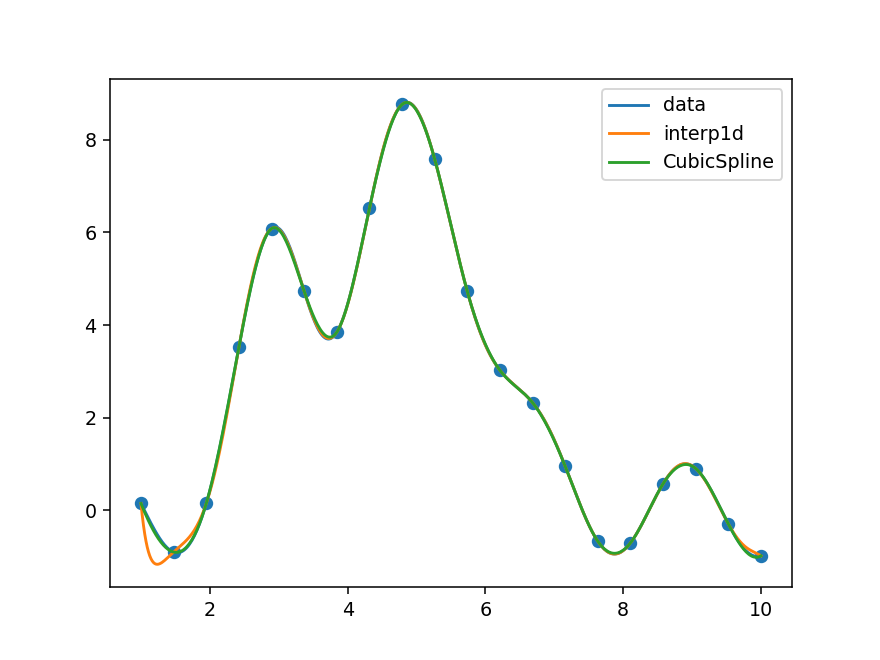

interpolate.interp1d: 1.0927645747663102
CubicSpline: 1.0104984771288077


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import CubicSpline
%matplotlib notebook

def f(x):
    return 5*np.exp(-((x-3)**2)/(2*(0.5**2)))+8*np.exp(-((x-5)**2)/(2*(0.9**2))) + np.sin(x*3)
    
x = np.linspace(1, 10, 20)
x_new = np.linspace(1, 10, 500)

fig, ax = plt.subplots()
ax.scatter(x, f(x))
ax.plot(x_new, f(x_new), label='data')

'''interpolate.interp1d'''
f_int1d = interpolate.interp1d(x, f(x), 7)
ax.plot(x_new, f_int1d(x_new), label='interp1d')
ratio_int1d = f_int1d(x_new)/f(x_new)
print('interpolate.interp1d:', np.mean(ratio_int1d))

'''CubicSpline'''
f_cs = CubicSpline(x, f(x))
ax.plot(x_new, f_cs(x_new), label='CubicSpline')
ratio_cs = f_cs(x_new)/f(x_new)
print('CubicSpline:', np.mean(ratio_cs))


plt.legend()

# Q3: Basins of attraction

<IPython.core.display.Javascript object>


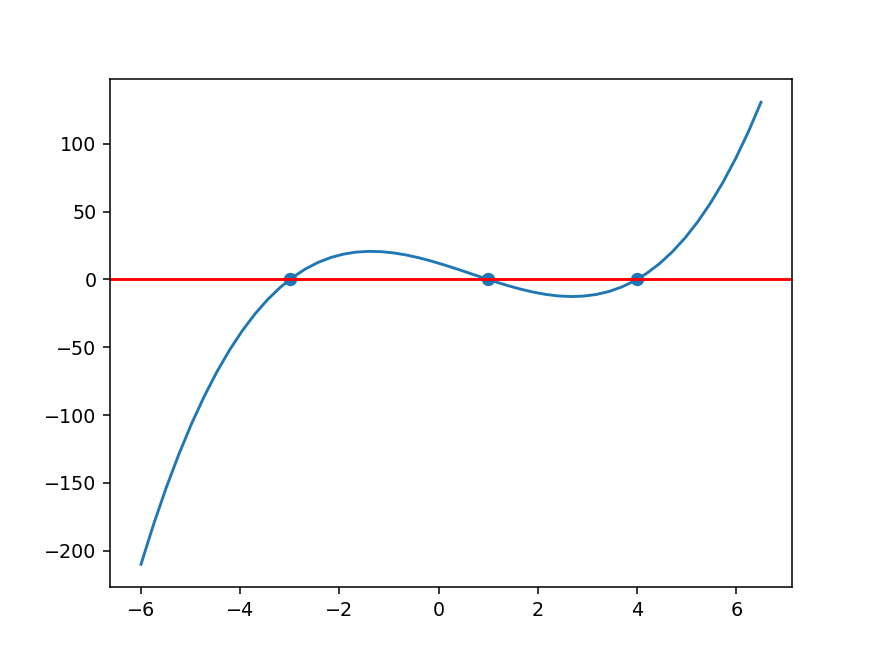

-3.0 1.0 4.0


In [94]:
from scipy import optimize

def q(x):
    return x**3-2*x**2-11*x+12

x = np.linspace(-6, 6.5, 50)

fig, ax = plt.subplots()
ax.plot(x, q(x))
plt.axhline(y=0, xmin=-10, xmax=10, c='r')

root1, r1 = optimize.brentq(q, -4, -2, full_output=True)  
root2, r2 = optimize.brentq(q, 0.7, 2, full_output=True)  
root3, r3 = optimize.brentq(q, 3, 5, full_output=True)  
print(root1, root2, root3)

roots = np.array([root1, root2, root3])

ax.scatter(roots, q(roots))

# Q7: Noisy signal

<IPython.core.display.Javascript object>


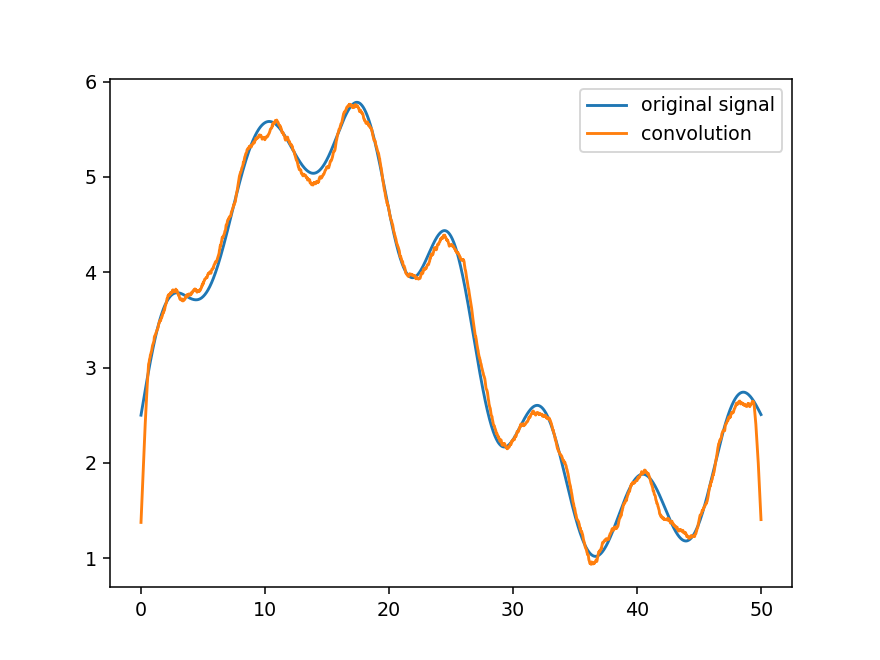

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook

def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

fig, ax = plt.subplots()
#ax.plot(x, noisy)
ax.plot(x, orig, label='original signal')

gaus = signal.gaussian(50, 19)
#plt.plot(gaus)

gaus_normal = gaus/np.sum(gaus)
#plt.plot(gaus_normal)

conv = signal.convolve(noisy, gaus_normal, mode='same', method='fft')
ax.plot(x, conv, label='convolution')
plt.legend()